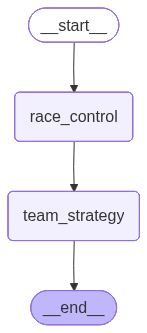

In [1]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class RaceControlState(TypedDict):
    incident_report: str

class TeamStrategyState(TypedDict):
    pit_window_laps: int

def race_control_node(state: RaceControlState) -> TeamStrategyState:
    print("---Race Control Reporting Incident---")
    laps = 5 if "Safety Car" in state['incident_report'] else 10
    return {"pit_window_laps": laps}

def team_strategy_node(state: TeamStrategyState) -> RaceControlState:
    print("---Team Strategy Adjusting Based on Pit Window---")
    decision = f"Box in {state['pit_window_laps']} laps."
    return {"incident_report": decision}

builder = StateGraph(RaceControlState)
builder.add_node("race_control", race_control_node)
builder.add_node("team_strategy", team_strategy_node)

builder.add_edge(START, "race_control")
builder.add_edge("race_control", "team_strategy")
builder.add_edge("team_strategy", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [2]:
graph.invoke({"incident_report" : "Safety Car Deployed"})

---Race Control Reporting Incident---
---Team Strategy Adjusting Based on Pit Window---


{'incident_report': 'Box in 5 laps.'}

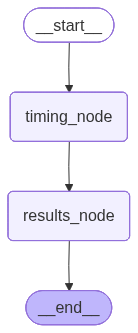

In [3]:
class FullRaceState(TypedDict):
    driver_name: str
    final_position: int
    fastest_lap: float

def timing_node(state: FullRaceState):
    print("---Calculating Fastest Lap---")
    return {"final_position": 1, "fastest_lap": 88.543}

def results_node(state: FullRaceState):
    print("---Confirming Final Position---")
    return {"final_position": state['final_position']}

graph = StateGraph(FullRaceState)
graph.add_node("results_node", results_node)
graph.add_node("timing_node", timing_node)
graph.add_edge(START, "timing_node")
graph.add_edge("timing_node", "results_node")
graph.add_edge("results_node", END)

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
graph.invoke({"driver_name":"Max Verstappen"})

---Calculating Fastest Lap---
---Confirming Final Position---


{'driver_name': 'Max Verstappen', 'final_position': 1, 'fastest_lap': 88.543}

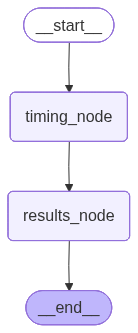

---Calculating Fastest Lap---
---Confirming Final Position---


{'final_position': 1}

In [5]:
class RaceInputState(TypedDict):
    driver_name: str

class RaceOutputState(TypedDict):
    final_position: int

class FullRaceStateInternal(TypedDict):
    driver_name: str
    final_position: int
    fastest_lap: float

def timing_node(state: RaceInputState):
    print("---Calculating Fastest Lap---")
    return {"final_position": 1, "fastest_lap": 88.543}

def results_node(state: FullRaceStateInternal) -> RaceOutputState:
    print("---Confirming Final Position---")
    return {"final_position": state['final_position']}

graph = StateGraph(
    FullRaceStateInternal,
    input_schema=RaceInputState,
    output_schema=RaceOutputState
)
graph.add_node("results_node", results_node)
graph.add_node("timing_node", timing_node)
graph.add_edge(START, "timing_node")
graph.add_edge("timing_node", "results_node")
graph.add_edge("results_node", END)

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"driver_name":"Max Verstappen"})